# Pymaceuticals Inc.
---

### Analysis
Here's an analysis of this project with a couple pointers:
- The Drug Regimens of Capomulin and Ramicane have the highest amount of mice per the bar charts with 230 mice and 228 mice, respectively.
- The pie charts indicate that the ratio between male and female mice in total is very close, with a percentage of 51% male and 49% female.
- In regards to Capomulin treatment, the tumor size was its highest on the 20th day but its lowest around after the 30th day.
- The final chart, which shows the scatterplot and a regresion line shows that the more the mouse weighs, the more the tumor volume is, which is a correct correlation. The correlation of this specifically is 0.84 or 84%.
- Capomulin and Ramicane seem to have better rate in regards to the box plot, while Infubinol and Ceftamin is high with an outlier in Infubinol data.
- Ketapril is the regiment with the highest tumor volume, in regards to mean.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
mouse_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
# mice_number = mouse_combined_df["Mouse ID"].value_counts()
# mice_number

#Tried nunique which works here too: https://www.w3schools.com/python/pandas/ref_df_nunique.asp
mice_number = len(mouse_combined_df["Mouse ID"].unique())
mice_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_ID = mouse_combined_df.loc[mouse_combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupe_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_ID_df = mouse_combined_df.loc[mouse_combined_df["Mouse ID"] == "g989"]
dupe_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_combined_df[mouse_combined_df["Mouse ID"].isin(dupe_ID) == False]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_clean = len(clean_mouse_df["Mouse ID"].unique())
mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
variance = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std_dev = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std_dev, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggreg_table = clean_mouse_df.groupby(["Drug Regimen"])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggreg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
mice_count = clean_mouse_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

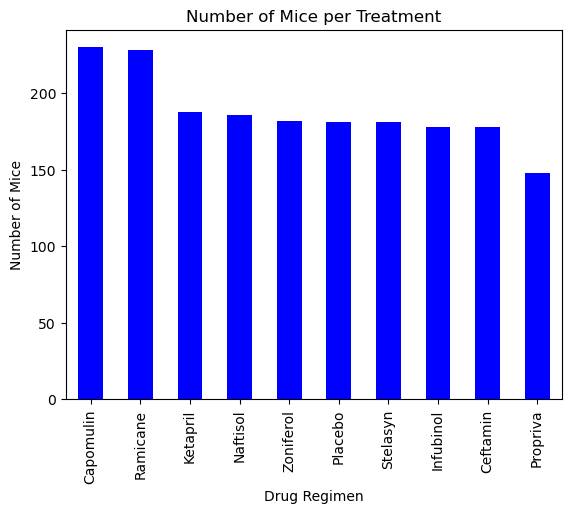

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_mice = mice_count.plot.bar(color = 'b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


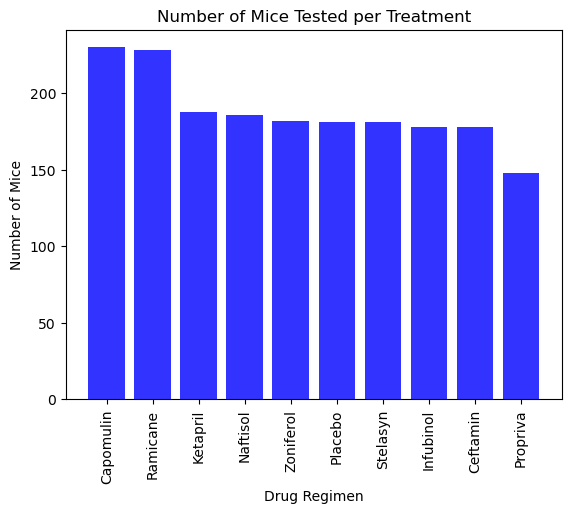

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


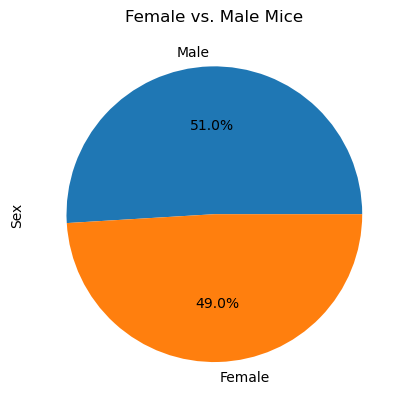

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_mouse_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_mice.plot.pie(autopct= "%1.1f%%")
plt.show()


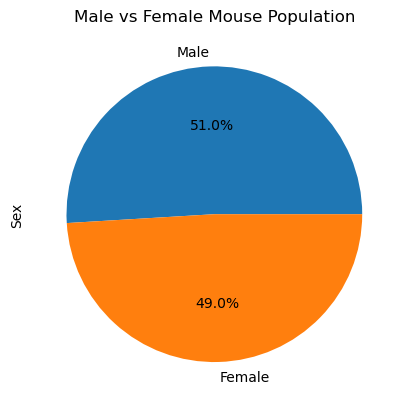

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 51]
plot = gender_mice.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Capomulin
capo_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capo_vol = pd.DataFrame(capo_last)
capo_merge = pd.merge(capo_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
capo_merge.head()
capo_tumors = capo_merge["Tumor Volume (mm3)"]

#RRamicane
rami_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
rami_vol = pd.DataFrame(rami_last)
rami_merge = pd.merge(rami_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
rami_merge.head()
rami_merge.to_csv("output.csv")
rami_tumors = rami_merge["Tumor Volume (mm3)"]

#Infubinol
infu_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infu_vol = pd.DataFrame(infu_last)
infu_merge = pd.merge(infu_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
infu_merge.head()
infu_tumors = infu_merge["Tumor Volume (mm3)"]

#Ceftamin
ceft_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceft_vol = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_vol, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
ceft_merge.head()
ceft_tumors = ceft_merge["Tumor Volume (mm3)"]


In [16]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

by_mouse = mouse_combined_df.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(mouse_combined_df,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quartile_first = quartiles[0.25]
    quartile_last = quartiles[0.75]
    quartile_range = quartile_last - quartile_first
    lower_bound = quartile_first - (1.5 * quartile_range)
    upper_bound = quartile_last + (1.5 * quartile_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


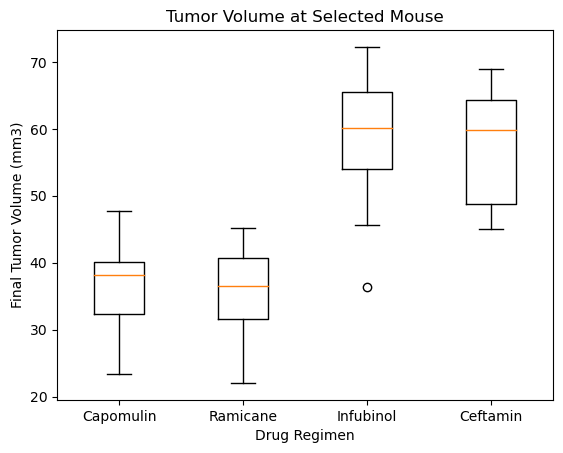

<Figure size 100x300 with 0 Axes>

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_data = [capo_tumors, rami_tumors, infu_tumors, ceft_tumors]
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_data, labels=drug_regimen, widths = 0.4, vert=True)
plt.figure(figsize=(1, 3))
plt.show()


## Line and Scatter Plots

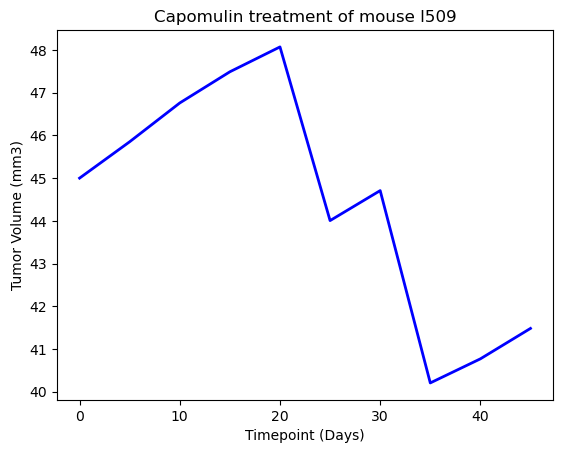

<Figure size 600x800 with 0 Axes>

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
capo_line_df.head()
x_axis = capo_line_df["Timepoint"]
tumsiz = capo_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.figure(figsize=(6, 8))
plt.show()

C:\Users\ayelb\AppData\Local\Temp\ipykernel_39392\2005380744.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capo_vol =capomulin_df.groupby(['Mouse ID']).mean()


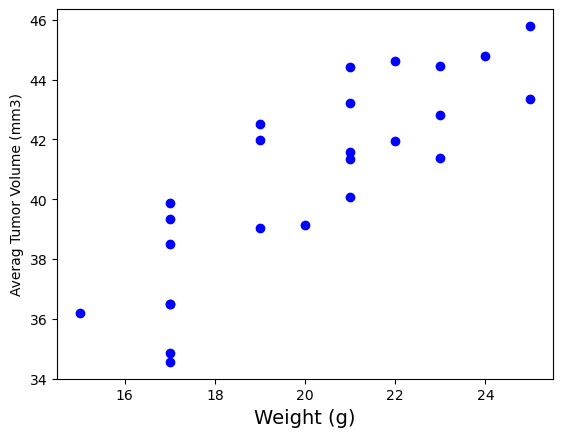

<Figure size 600x800 with 0 Axes>

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.figure(figsize=(6, 8))
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


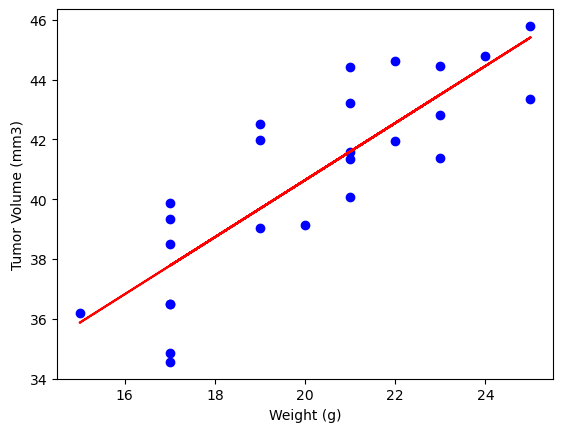

<Figure size 600x800 with 0 Axes>

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correl_coeff = st.pearsonr(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correl_coeff[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capo_vol["Weight (g)"],avg_capo_vol["Tumor Volume (mm3)"])
regress_values=avg_capo_vol["Weight (g)"]* slope + intercept

plt.scatter(avg_capo_vol["Weight (g)"],avg_capo_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capo_vol["Weight (g)"], regress_values, color='red')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.figure(figsize=(6, 8))
plt.show()
